## K-means clustering and principal component analysis

This exercise is described in [ex7.pdf](data/ml-ex7/ex7.pdf).

In [12]:
import numpy as np
import scipy.io as sio
import imageio
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap, NoNorm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### K-means clustering

#### Example dataset

In [13]:
# Load example dataset
data = sio.loadmat('data/ml-ex7/ex7data2.mat')

In [14]:
# Examples with features x1 and x2
X = data['X']

In [15]:
# Run K-means clustering with 3 centroids
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
# Obtain cluster centroids
centroids = kmeans.cluster_centers_

# Obtain cluster assignments
assignments = kmeans.labels_

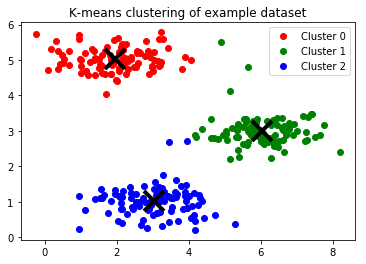

In [17]:
def plot_cluster(X, centroids, assignments, cluster, color):
    '''Plot members and centroid of given cluster.'''
    plt.plot(X[assignments == cluster, 0], X[assignments == cluster, 1], f'{color}o', label=f'Cluster {cluster}')
    plt.plot(centroids[cluster, 0], centroids[cluster, 1], 'kx', ms=20, mew=4)
    
# Plot 3 clusters with colors red, green and blue
for i, color in enumerate('rgb'):
    plot_cluster(X, centroids, assignments, i, color)    

plt.title('K-means clustering of example dataset')
plt.legend()

#### Image compression

In [18]:
# Read image into a 128*128*3 tensor and 
# normalize RGB values to [0, 1] interval.
A = imageio.imread('data/ml-ex7/bird_small.png') / 255

# Reshape to an m*3 matrix (with m = 128*128),
# a design matrix of m examples in RGB space
X = A.reshape(-1,3)

In [19]:
# Run K-means clustering with 16 centroids
# to find the top 16 colors in the image.
kmeans = KMeans(n_clusters=16)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
# Use cluster centroids to define a color map 
# with 16 entries.
cmap = ListedColormap(kmeans.cluster_centers_)

In [21]:
# Reshape cluster assignments to a 128*128 matrix 
# which encodes the compressed image (where pixel 
# values are integers within interval [0, 15], 
# referencing an entry in cmap)
A_compressed = kmeans.labels_.reshape(128, 128)

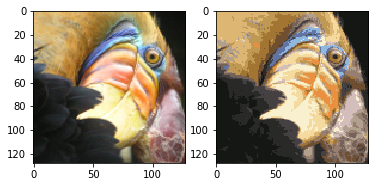

In [22]:
# Plot original image (16.7M colors)
plt.subplot(1, 2, 1)
plt.imshow(A)

# Plot compressed image (16 colors)
plt.subplot(1, 2, 2)
plt.imshow(A_compressed, cmap=cmap, norm=NoNorm())

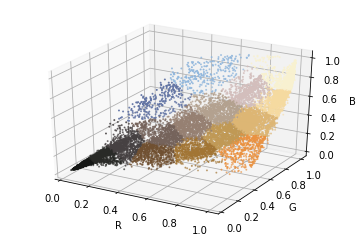

In [23]:
# Show clusters in (normalized) RGB space
sp = plt.figure().add_subplot(111, projection='3d')
sp.set_xlabel('R')
sp.set_ylabel('G')
sp.set_zlabel('B')
sp.scatter(X[:,0], X[:,1], X[:,2], s=1, c=kmeans.labels_, cmap=cmap)

In [24]:
# Learn principal components 1 and 2 from RGB data
# (see section 2.5 in exercise description ex7.pdf)
pca = PCA(n_components=2)
pca.fit(X)

# Run 3D -> 2D reduction of RGB data
X_red = pca.transform(X)

Text(0,0.5,'Principal component 2')

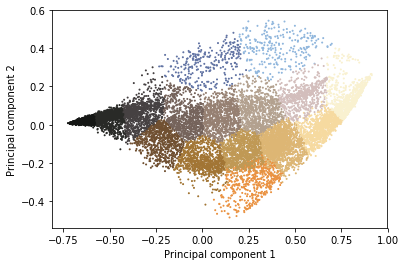

In [25]:
# Show cluster in 2D space
plt.scatter(X_red[:,0], X_red[:,1], s=1, c=kmeans.labels_, cmap=cmap)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

### Principal component analysis

#### Example dataset

In [26]:
# Load example dataset
data = sio.loadmat('data/ml-ex7/ex7data1.mat')

In [27]:
# Examples with features x1 and x2
X = data['X']

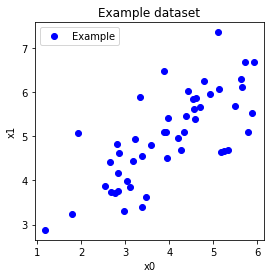

In [28]:
# Create a figure and an Axes object (for later re-use)
fig, ax = plt.subplots()

# Plot example dataset
ax.plot(X[:,0], X[:,1], 'bo', label='Example')
ax.set_title('Example dataset')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_aspect('equal', adjustable='box')
ax.legend()


In [29]:
# Standard scaler instance
scaler = StandardScaler()

# PCA instance
pca = PCA()

# PCA pipeline with data pre-processing to zero mean and unit variance
pipeline = Pipeline(steps=[('scaler', scaler), ('pca', pca)])

In [30]:
# Learn principal components
pipeline.fit(X)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

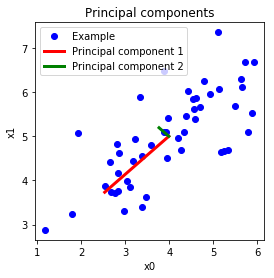

In [31]:
# The length of the plotted principal components should 
# correspond to their eigenvalues (explained variance). 
components = pca.components_ * pca.explained_variance_.reshape(-1,1)

# Transform principal components back onto original data 
components = scaler.inverse_transform(components)

# Obtain original data mean values
mean = scaler.mean_

# Plot transformed principal components on original data
ax.set_title('Principal components')
ax.plot([mean[0], components[0,0]], 
        [mean[1], components[0,1]], 
        'r-', lw=3, label='Principal component 1')
ax.plot([mean[0], components[1,0]], 
        [mean[1], components[1,1]], 
        'g-', lw=3, label='Principal component 2')
ax.legend()


# Show figure with original data and principal components
fig

In [32]:
# For 2D -> 1D reduction, set number 
# of principal components to 1.
pca.n_components = 1

# Re-learn first principal component
pipeline.fit(X)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [33]:
# Project data onto first principal component
X_red = pipeline.transform(X)

# Result is a vector (m*1 array) X_red
X_red.shape

(50, 1)

In [34]:
# Transform projections back into 2D space
X_rec = pipeline.inverse_transform(X_red)

# Result is a matrix (m*2 array) X_rec
X_rec.shape

(50, 2)

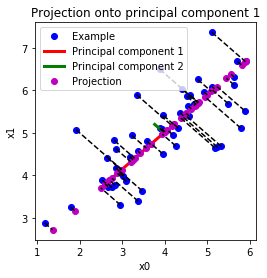

In [35]:
# Plot projections onto first principal component in 2D space
ax.plot(X_rec[:,0], X_rec[:,1], 'mo', label='Projection')

# Plot lines between original data and their projections
for i in range(X.shape[0]):
    ax.plot([X[i,0], X_rec[i,0]], [X[i,1], X_rec[i,1]], 'k--')

ax.set_title('Projection onto principal component 1')
ax.legend()    
    
fig

#### Face image dataset

In [36]:
# Load faces dataset
data = sio.loadmat('data/ml-ex7/ex7faces.mat')

In [37]:
# Faces image data (5000*1024)
X = data['X']

In [38]:
def plot_images(X, n_rows, n_cols):
    '''Plot first n_rows * n_cols images from dataset X.
    
    X must be of shape (m, 1024).
    '''
    plt.figure(figsize=(n_cols, n_rows))
    plt.subplots_adjust(hspace=0, wspace=0)

    for i in range(n_rows * n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(X[i].reshape((32,32), order='F'), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

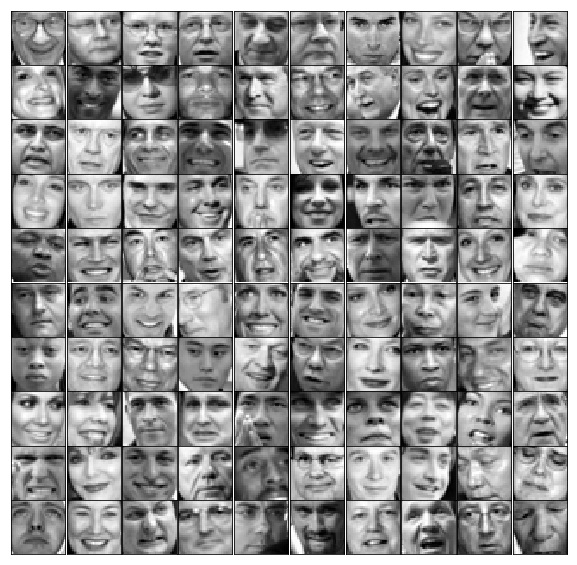

In [39]:
# Plot first 100 images from the faces dataset
plot_images(X, 10, 10)

In [40]:
# Standard scaler instance
scaler = StandardScaler()

# PCA instance for learning the first 100 principal components.
pca = PCA(n_components=100)

# PCA pipeline with data pre-processing to zero mean and unit variance
pipeline = Pipeline(steps=[('scaler', scaler), ('pca', pca)])

In [41]:
# Learn principal components
pipeline.fit(X)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

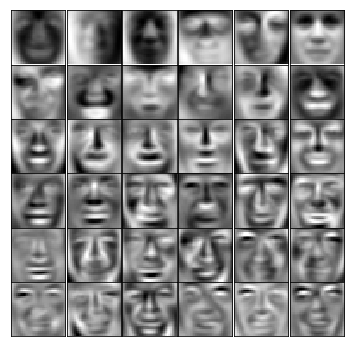

In [42]:
# Plot first 36 principal components ("eigenfaces")
plot_images(pca.components_, 6, 6)

In [43]:
# Run dimensionality reduction from 1024 to 100
X_red = pipeline.transform(X)

# Result is an 5000*100 matrix X_red
X_red.shape

(5000, 100)

In [44]:
# Recover image from projected data
X_rec = pipeline.inverse_transform(X_red)

# Result is an 5000*1024 matrix X_rec
X_rec.shape

(5000, 1024)

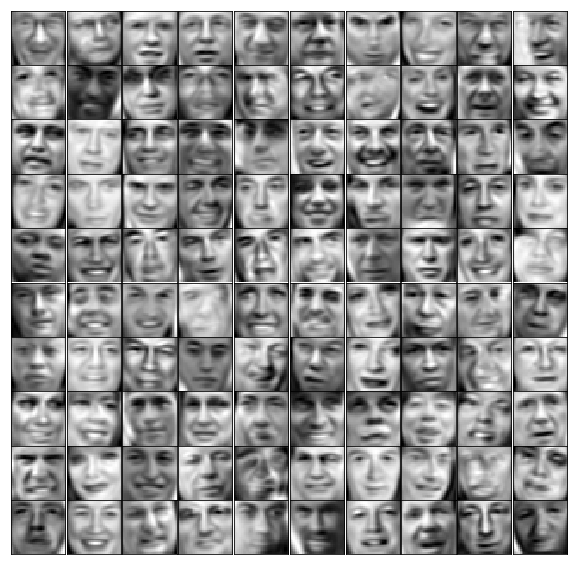

In [45]:
# Plot first 100 recovered images
plot_images(X_rec, 10, 10)